In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Загрузка DF

In [2]:
df = pd.read_csv('/content/data.csv')
df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [3]:
df.columns.tolist()

['valence',
 'year',
 'acousticness',
 'artists',
 'danceability',
 'duration_ms',
 'energy',
 'explicit',
 'id',
 'instrumentalness',
 'key',
 'liveness',
 'loudness',
 'mode',
 'name',
 'popularity',
 'release_date',
 'speechiness',
 'tempo']

### 📊 Описание признаков (фичей)

| Название          | Значение                                                                 |
|-------------------|--------------------------------------------------------------------------|
| `valence`         | Насколько песня звучит радостно (0 - грусть, 1 - радость)                |
| `year`            | Год выпуска                                                              |
| `acousticness`    | Акустичность (ближе к 1 - акустическая запись)                           |
| `artists`         | Исполнители трека                                                        |
| `danceability`    | Танцевальность (насколько удобно двигаться под трек)                     |
| `duration_ms`     | Длительность песни в миллисекундах                                       |
| `energy`          | Энергичность песни                                                       |
| `explicit`        | 1 - содержит ненормативную лексику, 0 - нет                              |
| `id`              | Уникальный ID песни в Spotify                                            |
| `instrumentalness`| Насколько песня инструментальная (0 - вокал, 1 - почти без слов)         |
| `key`             | Музыкальный ключ (тональность: 0 = C, ..., 11 = B)                       |
| `liveness`        | Насколько песня записана «вживую»                                        |
| `loudness`        | Средняя громкость в децибелах                                            |
| `mode`            | 1 - мажор, 0 - минор                                                      |
| `name`            | Название песни                                                           |
| `popularity`      | Оценка популярности от 0 до 100                                          |
| `release_date`    | Полная дата релиза                                                       |
| `speechiness`     | Доля речи в песне (высокое значение - рэп, подкаст)                      |
| `tempo`           | Темп в ударах в минуту (BPM)                                              |

# Первичный анализ

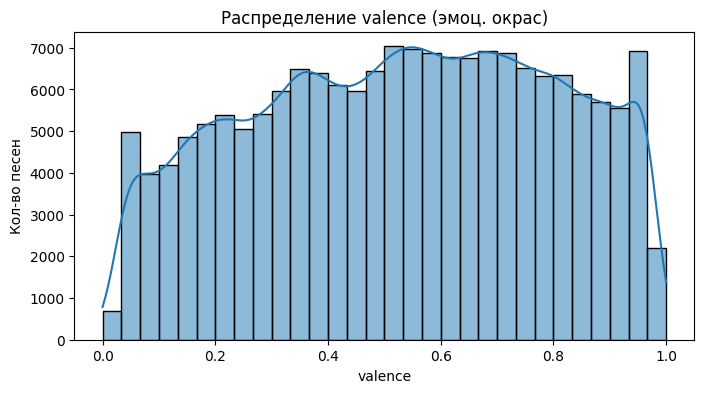

In [10]:
plt.figure(figsize= (8, 4))
sns.histplot(df['valence'], bins=30, kde=True)
plt.title('Распределение valence (эмоц. окрас)')
plt.xlabel('valence')
plt.ylabel('Кол-во песен')
plt.show()

Музыка не концентрируется на одном типе эмоций - в базе много песен и весёлых, и нейтральных, и грустных.

модель сможет определять вкусы по спектру эмоций.

Пик у 0.6–0.7 = умеренно позитивная музыка преобладает.

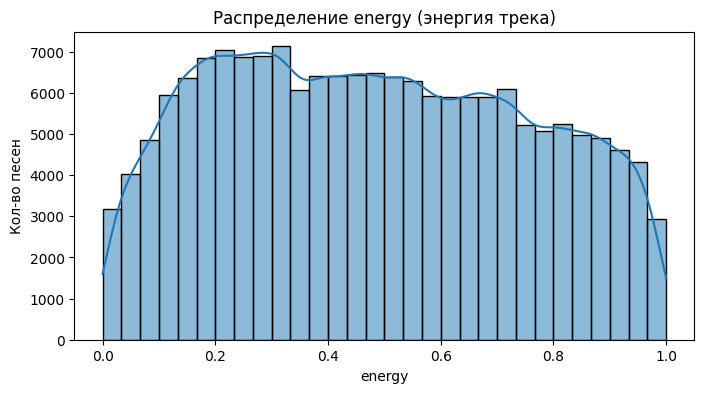

In [11]:
plt.figure(figsize = (8, 4))
sns.histplot(df['energy'], bins=30, kde=True)
plt.title('Распределение energy (энергия трека)')
plt.xlabel('energy')
plt.ylabel('Кол-во песен')
plt.show()

Песни с низкой и средней энергией встречаются чаще, чем очень заряженные.

Возможные причины:
в датасете много старой музыки (до 1980-х), где меньше электронного звучания;
поп-песни не всегда взрывные, особенно баллады.

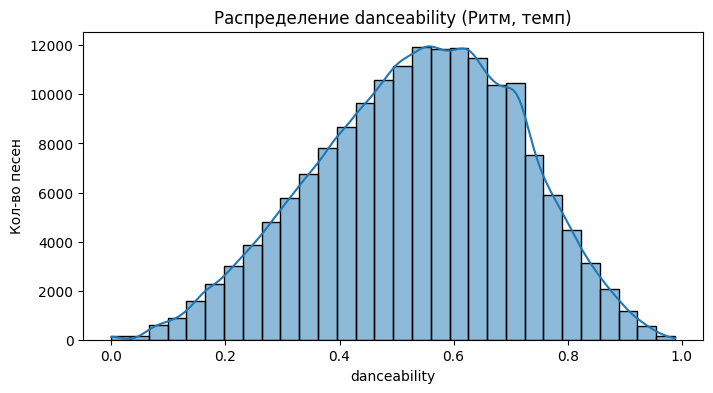

In [13]:
plt.figure(figsize = (8, 4))
sns.histplot(df['danceability'], bins=30, kde=True)
plt.title('Распределение danceability (Ритм, темп)')
plt.xlabel('danceability')
plt.ylabel('Кол-во песен')
plt.show()

Песни с danceability < 0.3 — редко встречаются (это может быть классика, джаз, лоу-фай).

Высокие значения (> 0.8) — чаще в клубной/рэп музыке.

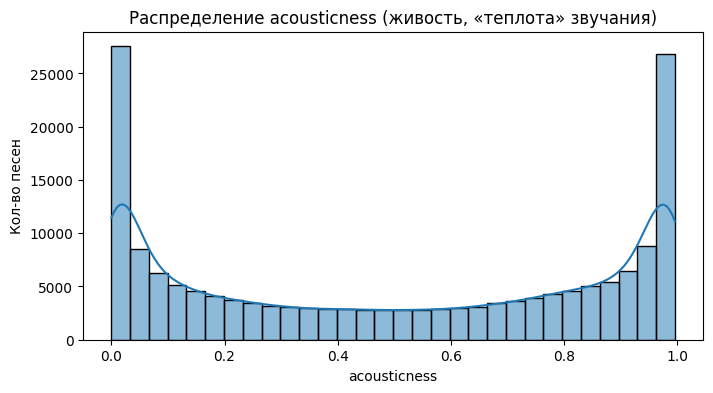

In [14]:
plt.figure(figsize = (8, 4))
sns.histplot(df['acousticness'], bins=30, kde=True)
plt.title('Распределение acousticness (живость, «теплота» звучания)')
plt.xlabel('acousticness')
plt.ylabel('Кол-во песен')
plt.show()


Музыка делится на два лагеря:

Очень живые, акустические записи (0.95+) - folk, unplugged, классика

Электронная, обработанная музыка (0–0.1) - поп, хип-хоп, edm

Почти нет «нейтральных» песен (0.4–0.6).

! Это делает acousticness отличной фичей для классификации: пользователь либо любит «живое», либо цифровое.

## Анлиз связей между фичами

**Насколько энергичны радостные песни?**

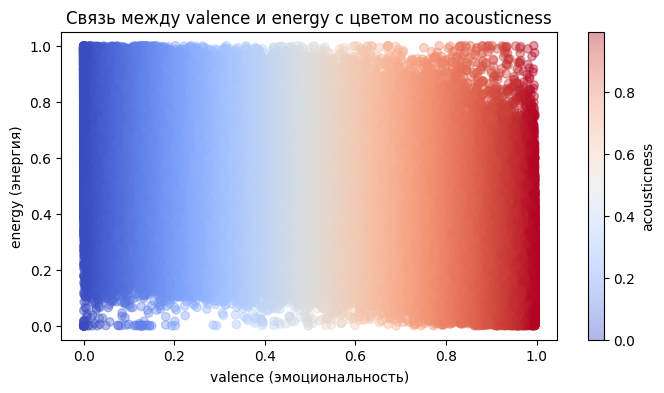

In [20]:
plt.figure(figsize = (8, 4))
scatter = plt.scatter(
  df['acousticness'],
  df['energy'],
  c=df['acousticness'],
  cmap='coolwarm',
  alpha=0.4
)
plt.colorbar(scatter, label='acousticness')
plt.title('Связь между valence и energy с цветом по acousticness')
plt.xlabel('valence (эмоциональность)')
plt.ylabel('energy (энергия)')
plt.show()

*размазанная положительная корреляция*

Положительная нелинейная корреляция между valence и energy: радостные песни чаще энергичны.
Цвет: чем ниже энергия и валенс = тем выше акустичность (синее пятно внизу слева).
В правом верхнем углу - почти нет акустики: весёлые и энергичные треки = цифровые.

**Танцевальные песни — всегда радостные?**

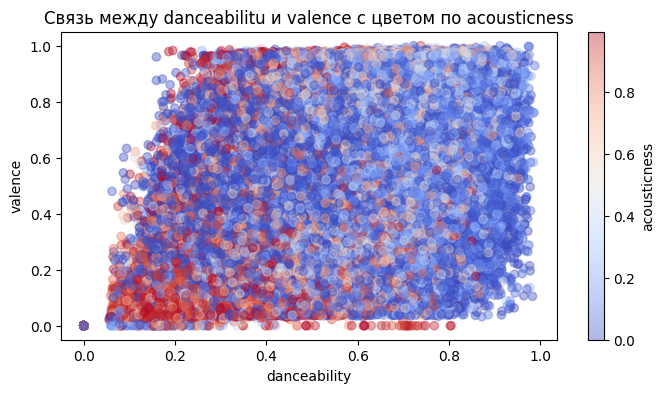

In [22]:
plt.figure(figsize = (8, 4))
scatter = plt.scatter(
    df['danceability'],
    df['valence'],
    c=df['acousticness'],
    cmap='coolwarm',
    alpha=0.4
)
plt.colorbar(scatter, label='acousticness')
plt.title('Связь между danceabilitu и valence с цветом по acousticness')
plt.xlabel('danceability')
plt.ylabel('valence')
plt.show()

Чёткая кластерация: высокая danceability + valence = часто низкая акустичность (электронная попса, рэп).
При этом есть и живые песни с высоким valence, но danceability у них умеренная.
Чистые акустические (красные точки) = концентрируются внизу и слева.

если человек любит танцевальные и радостные песни-— скорее всего он не слушает живую музыку

**живые песни чаще энергичные или нет?**

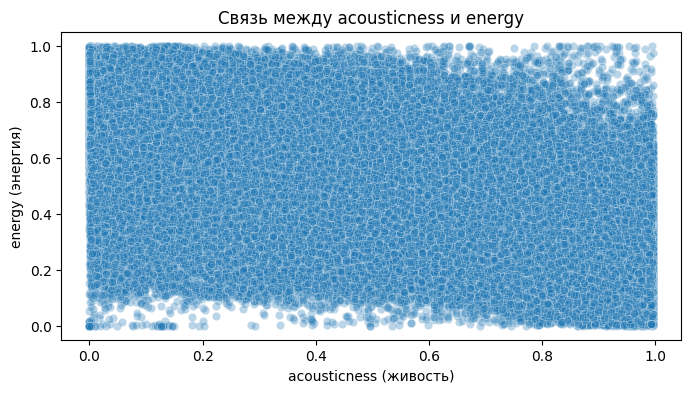

In [26]:
plt.figure(figsize = (8, 4))
sns.scatterplot(data = df, x='acousticness', y='energy', alpha=0.3)
plt.title('Связь между acousticness и energy')
plt.xlabel('acousticness (живость)')
plt.ylabel('energy (энергия)')
plt.show()

Небольшая отрицательная нелинейная корреляция:

низкая acousticness → часто высокая энергия;

высокая acousticness → чаще низкая энергия.